# py2jemris demo 
This notebook demonstrates usage of py2jemris functions. In the end, we test-simulate a Pulseq file using JEMRIS on the command line.
Run the cells in order to ensure that subsequent tests work. 
Look to the left for Table of Contents to access each part of the demo.
Email questions to gt2407@columbia.edu. Thanks for trying this out!

## Install JEMRIS for simulation

1. Download JEMRIS 2.8.3 from the official website

In [1]:
!wget http://www.jemris.org/get/jemris-2.8.3-Linux.deb --no-check-certificate

--2020-08-27 17:27:05--  http://www.jemris.org/get/jemris-2.8.3-Linux.deb
Resolving www.jemris.org (www.jemris.org)... 193.175.154.2
Connecting to www.jemris.org (www.jemris.org)|193.175.154.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8655898 (8.3M) [application/x-debian-package]
Saving to: ‘jemris-2.8.3-Linux.deb’

jemris-2.8.3-Linux. 100%[===================>]   8.25M  1.98MB/s    in 4.4s    

2020-08-27 17:27:10 (1.89 MB/s) - ‘jemris-2.8.3-Linux.deb’ saved [8655898/8655898]



Then we install JEMRIS dependencies. 

In [2]:
# Install requirements for jemris 
!sudo apt-get update -y
!sudo apt-get install -y libcln6 
!sudo apt-get install -y libginac6
!sudo apt-get install -y ginac-tools 
!sudo apt-get install -y libsundials-nvecserial2
!sudo apt-get install -y libsundials-cvode2

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ Packages [95.3 kB]
Get:12 http://ppa.launchpad.net/marut

Link library names (?) so JEMRIS can find one specific CVODE package 

In [3]:
 !sudo /sbin/ldconfig -v

/sbin/ldconfig.real: Path `/usr/local/lib' given more than once
/sbin/ldconfig.real: Can't stat /usr/local/nvidia/lib: No such file or directory
/sbin/ldconfig.real: Can't stat /usr/local/nvidia/lib64: No such file or directory
/sbin/ldconfig.real: Can't stat /usr/local/lib/x86_64-linux-gnu: No such file or directory
/sbin/ldconfig.real: Path `/lib/x86_64-linux-gnu' given more than once
/sbin/ldconfig.real: Path `/usr/lib/x86_64-linux-gnu' given more than once
/usr/local/cuda-10.1/extras/CUPTI/lib64:
	libcupti.so.10.1 -> libcupti.so.10.1.208
	libnvperf_host.so -> libnvperf_host.so
	libnvperf_target.so -> libnvperf_target.so
/usr/local/lib:
	libmkl_avx.so -> libmkl_avx.so
	libmkl_blacs_openmpi_ilp64.so -> libmkl_blacs_openmpi_ilp64.so
	libmkl_vml_mc2.so -> libmkl_vml_mc2.so
	libmkl_avx512_mic.so -> libmkl_avx512_mic.so
	libmkl_mc3.so -> libmkl_mc3.so
	libmkl_blacs_intelmpi_lp64.so -> libmkl_blacs_intelmpi_lp64.so
	libmkl_vml_avx512.so -> libmkl_vml_avx512.so
	libmkl_core.so -> libmkl_co

2. Install JEMRIS onto the virtual machine. After this step, JEMRIS can be called from the command line with various options: 
* Generate sequence plots from JEMRIS .xml format
* Generate pulseq file from JEMRIS .xml format
* Perform simulation using information and references stored in "simu.xml"
* etc... (see http://www.jemris.org/ug_command_line.html) 


In [4]:
# Install JEMRIS 
!sudo dpkg -i jemris-2.8.3-Linux.deb

Selecting previously unselected package jemris.
(Reading database ... 144693 files and directories currently installed.)
Preparing to unpack jemris-2.8.3-Linux.deb ...
Unpacking jemris (2.8.3) ...
Setting up jemris (2.8.3) ...


Call JEMRIS command to check that it works:

In [5]:
# The following should run and explain how to use the JEMRIS command 
!jemris 


jemris 2.8.3 (3ce3164b704394c4c1a8a3746b3ddc1296727458)


  Usage:

  1. jemris <xml-file>        
     The file could be either a a) Simulation, b) Sequence, or c) Coilarray file, 
     so that a) the simultion is performed, b) a sequence diagram is written, 
     or c) the sensitivity maps are dumped, respectively.

  2. jemris modlist           
     Writes the file mod.xml containing a list of all available modules.

  Parameters:
     -o <output_dir>: Output directory
     -f <filename>:   Output filename (without extension)
     -x: Output sequence file for execution
     -d <def>=<val>:  Define custom sequence variable


## Install py2jemris

Install virtual scanner - the simulation portion contains py2jemris code. 

In [6]:
# Install latest dev build of virtualscanner to grab the py2jemris functionalities 
!pip install git+https://github.com/imr-framework/virtual-scanner.git@dev

  Cloning https://github.com/imr-framework/virtual-scanner.git (to revision dev) to /tmp/pip-req-build-rumicjzi
  Running command git clone -q https://github.com/imr-framework/virtual-scanner.git /tmp/pip-req-build-rumicjzi
  Running command git checkout -b dev --track origin/dev
  Switched to a new branch 'dev'
  Branch 'dev' set up to track remote branch 'dev' from 'origin'.
     |████████████████████████████████| 102kB 2.2MB/s 
     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 92kB 5.5MB/s 
     |████████████████████████████████| 2.2MB 8.7MB/s 
     |████████████████████████████████| 2.8MB 27.3MB/s 
     |████████████████████████████████| 133kB 37.3MB/s 
     |████████████████████████████████| 317kB 46.6MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 952kB 41.9MB/s 
     |████████████████████████████████| 92kB 10.2MB/s 
     |█████████

Re-install pypulseq (even though it was installed with virtual scanner) to get to the dev branch so that importing works later. 

In [7]:
# Reinstall pypulseq to dev in order to fix import problem 
!pip install git+https://github.com/imr-framework/pypulseq.git@dev

  Cloning https://github.com/imr-framework/pypulseq.git (to revision dev) to /tmp/pip-req-build-lbrd28wd
  Running command git clone -q https://github.com/imr-framework/pypulseq.git /tmp/pip-req-build-lbrd28wd
  Running command git checkout -b dev --track origin/dev
  Switched to a new branch 'dev'
  Branch 'dev' set up to track remote branch 'dev' from 'origin'.
     |████████████████████████████████| 14.5MB 316kB/s 
     |████████████████████████████████| 25.9MB 1.4MB/s 
  Created wheel for pypulseq: filename=pypulseq-1.2.0.post3-cp36-none-any.whl size=73258 sha256=06f95944627de2f875a836a6e996503a1bff21be626f89701feb5320049d588f
  Stored in directory: /tmp/pip-ephem-wheel-cache-jk476hde/wheels/18/dd/da/be52d6c4f99b9ccc0d8320b3862f73b03cf4e9a51c1299b008
Successfully built pypulseq
ERROR: virtual-scanner 1.0.26 has requirement numpy==1.16.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: virtual-scanner 1.0.26 has requirement pypulseq==1.2.0.post1, but you'll have pypulseq 

## Import necessary code for this demo 

In [8]:
# Import modules 

from pypulseq.Sequence.sequence import Sequence
from virtualscanner.server.simulation.py2jemris.coil2xml import coil2xml
from virtualscanner.server.simulation.py2jemris.seq2xml import seq2xml
from virtualscanner.server.simulation.py2jemris.sim_jemris import sim_jemris
from virtualscanner.server.simulation.py2jemris.pulseq_jemris_simulator import simulate_pulseq_jemris, create_and_save_phantom
from virtualscanner.server.simulation.py2jemris.recon_jemris import recon_jemris
from virtualscanner.server.simulation.py2jemris.sim2xml import sim2xml 
import virtualscanner.server.simulation.bloch.phantom as pht
from virtualscanner.server.simulation.bloch.pulseq_library import make_pulseq_irse, make_pulseq_se_oblique
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
from virtualscanner.utils.constants import SERVER_SIM_BLOCH_PY2JEMRIS_PATH
import os
import h5py


## Set output paths 

In [9]:
utest_path =  'sim/utest_outputs'
sim_path = 'sim'

In [10]:
# Make directory for storing outputs 
%cd /content 
!mkdir sim/utest_outputs -p 
!mkdir sim/custom -p 
!pwd

/content
/content


## Demo 1: Test coil2xml and visualize 

/content
/content
/content/sim/utest_outputs
0


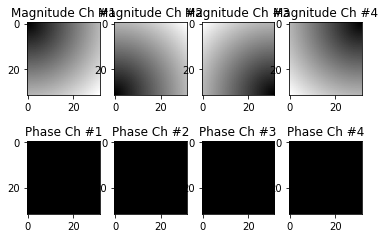

In [11]:
# Always go back to content folder first 
%cd /content

!pwd
 # Example on using coil2xml
# Generate coil using B1 maps and plot
# 4 channels with different B1 maps

b1 = np.ones((32,32))
XY = np.meshgrid(np.linspace(0,1,32), np.linspace(0,1,32))
X = XY[0]
Y = XY[1]

# Define coil sensitivity maps (complex arrays, in general)
b1_ch1 = np.sqrt(X**2 + Y**2)
b1_ch2 = np.rot90(b1_ch1)
b1_ch3 = np.rot90(b1_ch2)
b1_ch4 = np.rot90(b1_ch3)

coil2xml(b1maps=[b1_ch1, b1_ch2, b1_ch3, b1_ch4], fov=200, name='test_coil', out_folder=utest_path)

# Generate sensmaps.h5 using JEMRIS command

%cd sim/utest_outputs
out = os.system('jemris test_coil.xml') # Run jemris to create h5 sensitivity maps 
print(out)

# Load sensmaps.h5 and plot coil
a = h5py.File('sensmaps.h5', 'r')
maps_magnitude = a['maps/magnitude']
maps_phase = a['maps/phase']
plt.figure(1)
plt.title('Coil sensitivity maps')
for u in range(4):
    plt.subplot(2,4,u+1)
    plt.gray()
    plt.imshow(maps_magnitude[f'0{u}'])
    plt.title(f'Magnitude Ch #{u+1}')
    plt.subplot(2,4,u+5)
    plt.gray()
    plt.imshow(maps_phase[f'0{u}'])
    plt.title(f'Phase Ch #{u+1}')
plt.show()



## Demo 2: Seq2xml  
In this section, a pulseq sequence is generate from the Virtual Scanner sequence library and converted to a set of files that together make up a JEMRIS sequence:
- An (.xml) file that records the sequence structure and most high-level data
- An arbitrary number of (.h5) files that store (1) all unique RF pulses; (2) any unique non-trapezoid gradients

In [12]:
%cd /content 
# Seq2xml test 
# Make a sequence
seq = make_pulseq_irse(fov=0.256, n=16, thk=0.01, fa=15, tr=150, te=30, ti=10,
                        enc='xyz', slice_locs=None, write=False)

# Convert to .xml format
seq2xml(seq, seq_name='irse16_pulseq', out_folder=utest_path)

# Use JEMRIS to generate sequence diagrams from .xml sequence
os.chdir(utest_path)
print(os.system('dir'))


/content
dur rf 0.00213 dur gss: 0.00214
IRSE sequence constructed
{}
0


In [13]:
!jemris -x -d id=1 -f irse16_pulseq irse16_pulseq.xml
#out = os.system(f'jemris -x -d id=1 -f irse16_pulseq irse16_pulseq.xml')
#print(out)


jemris 2.8.3 (3ce3164b704394c4c1a8a3746b3ddc1296727458)

dump of sequence tree
                        TYPE              CLASS        NAME  duration      ADCs     TPOIs |  module specific
                        ----------------------------------------------------------------- |  ---------------
sequence-root------>   CONCAT       CONCATSEQUENCEConcatSequence2560000.160      256     98208  |  Repetitions = 1
  |_ child 1   ---->     ATOM       ATOMICSEQUENCE       C1     2.140        0      2034  | 
    |_ child 1   -->    PULSE      EXTERNALRFPULSE       R1     2.029        0      2032  |  Axis = RF  , InitDelay = 0.1 , (Flipangle,Phase,Bandwidth,Channel,Symmetry) = (0,0,1e+16,0,0.5)  , (Filename,Energy,TPOIs) = (rf_1.h5,3.45753,2032)
    |_ child 2   -->    PULSE        TRAPGRADPULSE       G1     2.080        0         4  |  Axis = GZ  , InitDelay = 0.06 , Area = 2.56354 , FlatTop: (Area,time)= (2.51327,2)
  |_ child 2   ---->     ATOM       ATOMICSEQUENCE       C2     0.000        

Plot the resulting waveforms, as interpreted and generated by JEMRIS: 

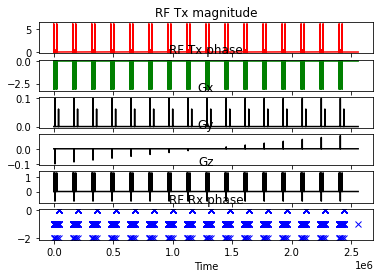

In [14]:
# Read sequence diagram and plot
data = h5py.File('irse16_pulseq.h5','r')
diag = data['seqdiag']

t = diag['T']
gx = diag['GX']
gy = diag['GY']
gz = diag['GZ']
rxp = diag['RXP']
txm = diag['TXM']
txp = diag['TXP']

ylist = [txm, txp, gx, gy, gz, rxp]
title_list = ['RF Tx magnitude', 'RF Tx phase', 'Gx', 'Gy', 'Gz', 'RF Rx phase']
styles = ['r-', 'g-', 'k-', 'k-', 'k-', 'bx']
plt.figure(1)
for v in range(6):
    plt.subplot(6,1,v+1)
    plt.plot(t, ylist[v], styles[v])
    plt.title(title_list[v])
    plt.xlabel('Time')

plt.show()



## Demo 3: create_and_save_phantom 
Make standard phantom from Virtual Scanner and convert it into JEMRIS-compatible (.h5) file format

Note: this must be run before the sim_jemris demo can run 

In [15]:
%cd /content 
# Creates a virtual scanner phantom and save it as an .h5 file (per JEMRIS standard)
phantom_info = {'fov': 0.256, 'N': 32, 'type': 'cylindrical', 'dim': 2, 'dir': 'z'}
create_and_save_phantom(phantom_info, out_folder=utest_path)
print("The phantom is saved as cylindrical.h5")

/content
Making cylindrical phantom
<class 'numpy.ndarray'>
The phantom is saved as cylindrical.h5


## Demo 4: sim_jemris

1. Take a list of existing sim file names and generate simu.xml 
2. Runs JEMRIS on the command line using these files
3. Reads the JEMRIS output and return them as a dictionary of data (in numpy array)

Make sure you run the phantom creation code above first. 
  

In [16]:
# Download gre32.xml from Github for sim purposes 
%cd /content/sim/utest_outputs 
!wget https://raw.githubusercontent.com/imr-framework/virtual-scanner/dev/virtualscanner/server/simulation/py2jemris/sim/utest_outputs/gre32.xml
!wget https://raw.githubusercontent.com/imr-framework/virtual-scanner/dev/virtualscanner/server/simulation/py2jemris/sim/uniform.xml
%cd ../..

/content/sim/utest_outputs
--2020-08-27 18:02:37--  https://raw.githubusercontent.com/imr-framework/virtual-scanner/dev/virtualscanner/server/simulation/py2jemris/sim/utest_outputs/gre32.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1500 (1.5K) [text/plain]
Saving to: ‘gre32.xml’

gre32.xml           100%[===================>]   1.46K  --.-KB/s    in 0s      

2020-08-27 18:02:38 (13.3 MB/s) - ‘gre32.xml’ saved [1500/1500]

--2020-08-27 18:02:38--  https://raw.githubusercontent.com/imr-framework/virtual-scanner/dev/virtualscanner/server/simulation/py2jemris/sim/uniform.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|

In [17]:
%cd /content

#******************** grab gre32.xml *****************************#
list_sim_orig = {'seq_xml': 'gre32.xml', 'pht_h5': 'cylindrical.h5', 'tx_xml':'uniform.xml',
                    'rx_xml': 'uniform.xml'}
out = sim_jemris(list_sim_orig, working_folder = utest_path)

%cd /content/sim/utest_outputs 
savemat('data32_orig.mat',out)
print('Data is saved in py2jemris/sim/utest_outputs/data32_orig.mat')


/content
Simulating using JEMRIS ...
0
0
sim/utest_outputs/signals.h5
/content/sim/utest_outputs/signals.h5
True
/content/sim/utest_outputs
Data is saved in py2jemris/sim/utest_outputs/data32_orig.mat


In [18]:
# Run this cell after JEMRIS finishes to save data 
%cd /content/
savemat('data32_orig.mat',out)
%cd /content 
print('Data is saved in py2jemris/sim/utest_outputs/data32_orig.mat')

/content
/content
Data is saved in py2jemris/sim/utest_outputs/data32_orig.mat


In [19]:
 # Optional code to download data 
 %cd /content 
 from google.colab import files
 files.download('sim/utest_outputs/data32_orig.mat')  # Download locally

/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Final demo: Simulation pipeline for checking custom seq files**
Option 1: Upload your own seq file to be simulated (this is to be tested)!


In [20]:
# Option 1: Upload your seq file
from google.colab import files
%cd /content/sim/custom
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

seqfile = uploaded.keys()[0] # Use the 1st file uploaded
# Alternatively, upload on the Files panel & change the filename (it needs to be inside /content/sim/custom) above  

/content/sim/custom


MessageError: ignored

Option 2: Construct a default sequence here instead

In [ ]:

# We use one from Virtual Scanner 
%cd /content/sim/custom 
make_pulseq_se_oblique(fov=0.256,n=5, thk=0.005, tr=0.2, te=0.05, fa=90,
                          enc='xyz', slice_locs=[0], write=True)
seqfile =  'se_fov256mm_Nf15_Np15_TE50ms_TR200ms_FA90deg.seq'

Next, we grab uniform.xml, the default/ideal RF coil configuration file used in JEMRIS.

In [ ]:
# Download uniform.xml from Github for sim purposes 
%cd /content/sim/custom 
!wget https://raw.githubusercontent.com/imr-framework/virtual-scanner/dev/virtualscanner/server/simulation/py2jemris/sim/uniform.xml
%cd ../..

Let's run the `simulate_pulseq_jemris()` function, designed for quick testing of custom pulseq files. 

In [ ]:
# Go back
%cd /content

# Define phantom 
# Using N=15; change this to have higher-resolution phantoms when needed 
phantom_info = {'fov': 0.256, 'N': 5, 'type': 'cylindrical', 'dim': 2, 'dir': 'z'}
sim_name = 'custom'

out = simulate_pulseq_jemris(seq_path='sim/custom/' + seqfile, phantom_info=phantom_info, sim_name=sim_name,
                        coil_fov=0.256, env_option='colab')
print(out)
print("Simulated!")

Then, load the signal, perform basic Cartesian reconstruction, and display: 

In [ ]:
%cd /content 
kk, im, images = recon_jemris(file='sim/' + sim_name + '/signals.h5', dims=[15, 15])

savemat('sim/' + sim_name + '/pulseq_sim_output.mat', {'images': images, 'kspace': kk, 'imspace': im})
print('Simulation result is in sim/custom/pulseq_sim_output.mat')

# Plot results
plt.figure(1)
plt.gray()
plt.imshow(np.squeeze(images))
plt.show()


Run the following cell to download the data as a MATLAB .mat file. 

In [ ]:
 # Optional code to download data 
 %cd /content 
 from google.colab import files
 files.download('sim/custom/pulseq_sim_output.mat')  # Download locally